In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from funciones import *

# Percolation Strength plots

## "Stationary parameters"

In [2]:
K = 10**4
mu1 = 10**-4
mu2 = 10**-4

nEE = 1.5#0.96
nEI = 1#0.24
nIE = -1 #-0.3
nII = 0. #0./10

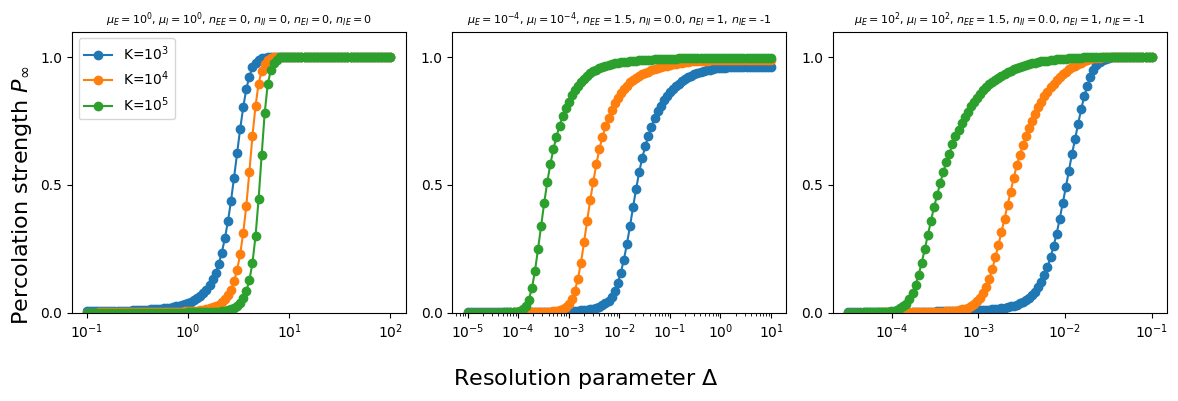

In [3]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-4.5, -1, 100)]
np.save(f'./data/deltas_bivariate_stationary', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_stationary_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_stationary_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


In [2]:
deltas = np.load(f'./data/deltas_bivariate_stationary.npy')
percolations_means_mu1 = [np.load(f'./data/percolation_mean_bivariate_stationary_plot_0_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_means_mu2 = [np.load(f'./data/percolation_mean_bivariate_stationary_plot_1_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_means_mu3 = [np.load(f'./data/percolation_mean_bivariate_stationary_plot_2_K={K}.npy')for K in [10**3, 10**4, 10**5]]

### Phase diagram

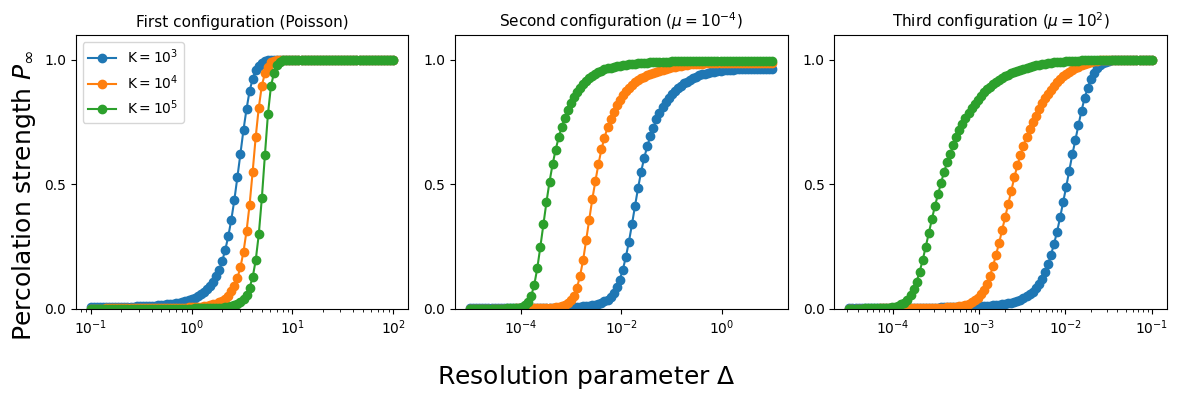

In [5]:
ns =[0, 1, 1]
mus = [1, 10**-4, 10**2]
titles = ['First configuration (Poisson)', 'Second configuration ($\mu=10^{-4}$)', 'Third configuration ($\mu=10^2$)']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolations_means_mu1[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolations_means_mu2[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolations_means_mu3[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')
#fig.axes[1].annotate('1-$\dfrac{1}{e}$', xy=(0.01, 1-1/np.exp(1)), xytext=(0.01, 1-1/np.exp(1)+0.1))
    

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

### Susceptibility $\chi$

In [6]:
percolations_sus_mu1 = [np.load(f'./data/percolation_sus_bivariate_stationary_plot_0_K={K}.npy')*np.sqrt(K) for K in [10**3, 10**4, 10**5]]
percolations_sus_mu2 = [np.load(f'./data/percolation_sus_bivariate_stationary_plot_1_K={K}.npy')*np.sqrt(K) for K in [10**3, 10**4, 10**5]]
percolations_sus_mu3 = [np.load(f'./data/percolation_sus_bivariate_stationary_plot_2_K={K}.npy')*np.sqrt(K) for K in [10**3, 10**4, 10**5]]

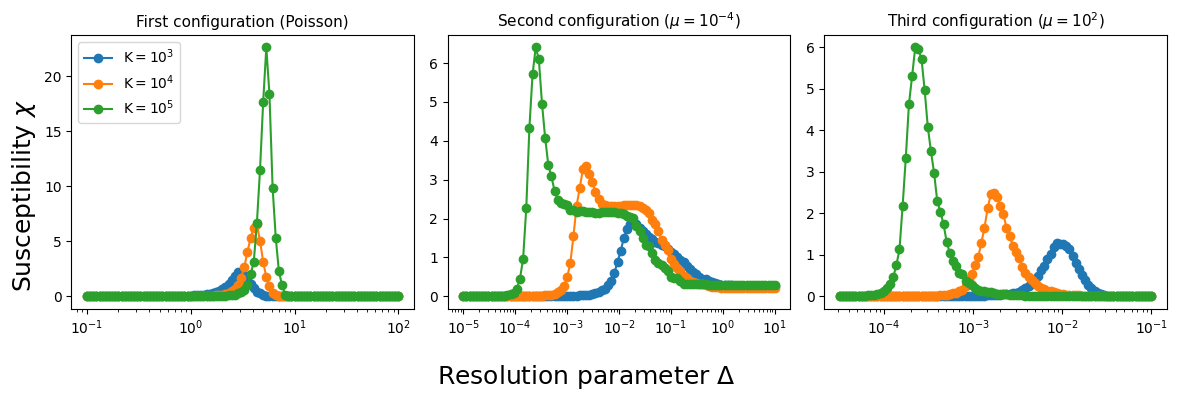

In [7]:
titles = ['First configuration (Poisson)', 'Second configuration ($\mu=10^{-4}$)', 'Third configuration ($\mu=10^2$)']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolations_sus_mu1[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolations_sus_mu2[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolations_sus_mu3[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Susceptibility $\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

## PRL parameters

In [8]:
K = 10**4
mu1 = 10**-4
mu2 = 10**-4

nEE = 0.96
nEI = 0.24
nIE = -0.3
nII = 0./10

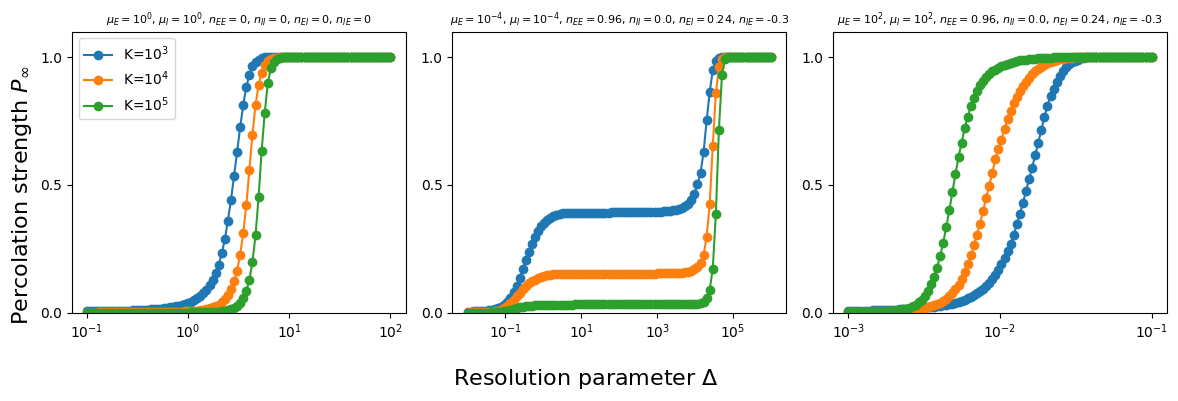

In [9]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-2, 6, 100), np.logspace(-3, -1, 100)]
np.save(f'./data/deltas_bivariate_PRL', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_PRL_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_PRL_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


In [10]:
deltas = np.load(f'./data/deltas_bivariate_PRL.npy')
percolations_means_mu1 = [np.load(f'./data/percolation_mean_bivariate_PRL_plot_0_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_means_mu2 = [np.load(f'./data/percolation_mean_bivariate_PRL_plot_1_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_means_mu3 = [np.load(f'./data/percolation_mean_bivariate_PRL_plot_2_K={K}.npy')for K in [10**3, 10**4, 10**5]]

### Phase diagram

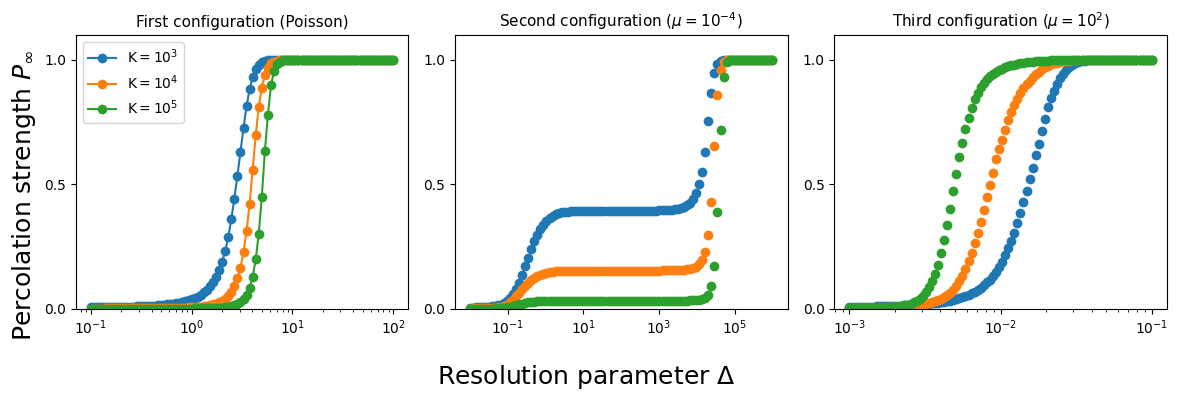

In [11]:
ns =[0, 1, 1]
mus = [1, 10**-4, 10**2]
titles = ['First configuration (Poisson)', 'Second configuration ($\mu=10^{-4}$)', 'Third configuration ($\mu=10^2$)']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolations_means_mu1[i], marker = 'o', label=labels[i])
    fig.axes[1].scatter(deltas[1], percolations_means_mu2[i], marker = 'o', label=labels[i])
    fig.axes[2].scatter(deltas[2], percolations_means_mu3[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

In [12]:
percolations_sus_mu1 = [np.load(f'./data/percolation_sus_bivariate_PRL_plot_0_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_sus_mu2 = [np.load(f'./data/percolation_sus_bivariate_PRL_plot_1_K={K}.npy') for K in [10**3, 10**4, 10**5]]
percolations_sus_mu3 = [np.load(f'./data/percolation_sus_bivariate_PRL_plot_2_K={K}.npy')for K in [10**3, 10**4, 10**5]]

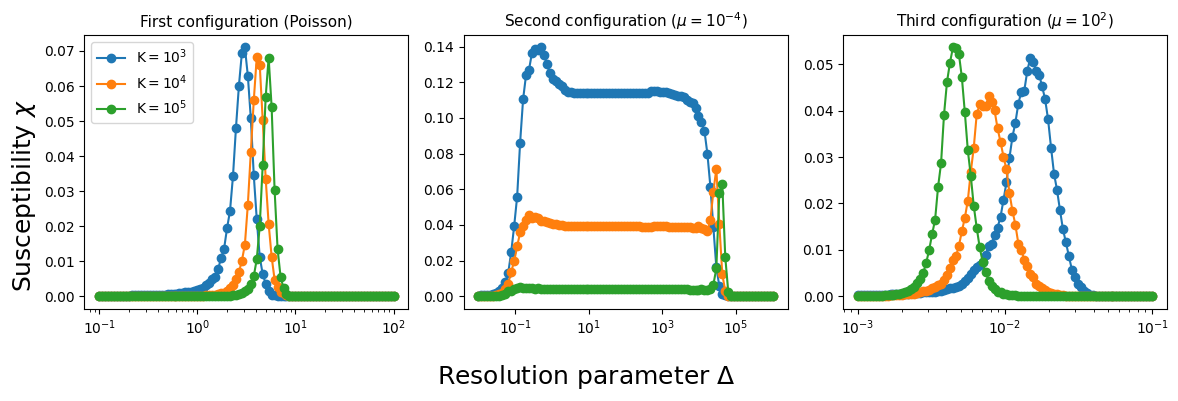

In [13]:
titles = ['First configuration (Poisson)', 'Second configuration ($\mu=10^{-4}$)', 'Third configuration ($\mu=10^2$)']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolations_sus_mu1[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolations_sus_mu2[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolations_sus_mu3[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)


fig.supylabel('Susceptibility $\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()